# Conceptos basicos de estadistica para modelizacion predictiva

## Muestreo aleatorio
+ Lo que queremos estudiar muchas veces tomaria mucho tiempo en realizar toda la captura de datos
+ Como solucion a esto podemos tomar una muestra aleatoria de tamaño *n* 
    + En este caso las metricas obtenidas tendran el subfijo de muestral:
        + media muestral
        + desviacion tipica/estandar muestral
        + proporcion muestral
+ A partir de estas metricas podemos inferir las metricas generales/poblacionales

## Teorema Central del limite
+ Se toman **n** Grupos en lugares diferentes
+ Para estos datos de distribucion desconocida se sabe que los promedios/medias de las *n* muestras tomadas, es decir las ***n* medias** seguiran una distribucion normal

## Contraste de hipotesis
+ Se asume una hipotesis segun un valor de un estimador:
    + Si es exactamente un valor => Contraste bilateral
    + Si esta dentro de un rango/region => Contraste unilateral
        + Asuminos el caso favorable (hipotesis nula) y lo defendemos hasta que se demuestre lo contrario
        + En caso contrario el resultado es no favorable (hipotesis alternativa) 
    
+ La poblacion de cierto lugar tiene una media u = u0
+ Generamos un experimento o toma de muestras a cierta poblacion
+ Tomamos nuestra hipotesis como media u, y para el caso de sigma tenemos dos posibles respuestas:
    + Desviacion estandar, cantidad de muestras n y promedio, conocidas por estudios previos, podemos aplicar un test de normalidad o z-test
        + z = (X - mu_X)/(sigma_X) = (X-mu)/(sigma/sqrt(n))
        + Da como resultado una distribucion normal
    + Desviacion estandar desconocida, mu se asume el de hipotesis, en este caso podemos emplear un t-test:
        + S = (sum(Xi-mu_X)**2)/(n-1) -> sigma
        + t = (X - mu)/(S/sqrt(n))
        + Da como resultado una distribucion T de student

### Como hacer un contraste de hipotesis paso a paso

**Conceptos Relevantes**

Si H_0 (hipotesis nula) es cierta, se esta modelando X como normal o T de Student:
+ Conocemos que el area bajo la curva de distribucion es igual 1
+ Asumiendo dos puntos Z1 y Z2 podemos plantear:
    + P(X < Z1) = p1 -> P(X > Z1) = 1 - p1
    + P(X < Z2) = p2 -> P(X > Z2) = 1 - p2
+ Para validar nuestra hipotesis podemos en distribuciones normales considerar intervalos de confianza que sean aceptables, como:
    + *-1sigma <= u0 <= 1sigma* = 68.2% de los valores
    + *-2sigma <= u0 <= 2sigma* = 95.4% de los valores
    + *-3sigma <= u0 <= 3sigma* = 99.7% de los valores
+ Al fijar los intervalos Z en los cuales la hipotesis sea validada aparece un valor conocido como nivel de significacion o \alpha, donde:
    + p - valor > \alpha => El estudio da razones para validar la hipotesis nula
    + p - valor < \alpha => Existen evidencias para rechazar la hipotesis
+ Existen varios estudios para validar este nivel de significancia:
    + Cola por la izquierda -> Hipotesis alternativa "menor que" Z 
    + Cola por la derecha -> Hipotesis alternativa "mayor que" Z
    + Dos Colas

**Pasos**:

1.- Definir hipotesis nula mu_0 y alternativa uni o bilateral

2.- Tomar muestra aleatoria de tamaño n y calcular el valor del estimador (Promedio, Proporcion, etc)

3.- Calcular estadistico de contraste z-valor o t-valor

4.- Calcular p-valor asociado

5.- Comparar p-valor y el nivel de significacion, luego decidir

### Ejemplo

Uni pizzero afirma enviar la comida en 20 minutos con una desviacion estandar de 3 minutos.

Sospechamos que es falso(1) por lo que tomamos 64 entregas de la ultima semana y obtenemos una media de 21.2 minutos(2)

Podemos aceptat la afirmacion del pizzero con un nivel de confianza del 95%? -> alpha = 0.05

sabemos la media propuesta y su desviacion estandar por lo que se aplica un z-test (3)

Z = (21.2 - 20)/(3/sqrt(64)) = 3.2

p = P(Z > 3.2) = 1 - P(Z<3.2) = 1 - 0.999 = 0.001 (4)

p = 0.001 < 0.05 = alpha , por lo que la hipotesis nula es verdadera y el pizzero esta equivocado (5)

## Test de Chi Cuadrado
+ Test empleado para comparar datos observados y datos esperados
+ Ejemplo al asumir una distribucion normal podemos comparar esta E_i a los datos que se estan midiendo O_i
+ Se describe como:    
    
    $$\Xi^2 = \sum_{i=1}^{n}((O_i-E_i)^2/(E_i))$$

Los test se dividen segun el numero de variables:
+ Una variable:
    + Bondad de ajuste
+ Dos variables:
    + Test de Homogeneidad
    + Test de Independencia
Este test tiene grados de libertad el que modela
+ Una variable:
    $$df = n_{categorias} - 1$$
+ Dos variables:
    $$df = (n_{row}-1) x (n_{col}-1)$$

**Ejemplo**:

Se tiera una moneda 1000 veces para saber si esta trucada, obteniendo 553 caras y 447 Cruces

Esta trucada? Como hipotesis se plantea que no y debido a esto la proporcion entre cara y sello debe ser 0.5

$$\Xi^2 = ((553-500)^2 + (447-500)^2/(500)) = 11.236$$

Asumiendo un nivel de significacion del 0.05 para 1 GDL ya que son 2 categorias se tiene que

$$\Xi^2_{\alpha} = 3.841$$

Por lo que se rechaza la hipotesis ya que sobrepasa por mucho el Xi para ese valor

## Correlacion
+ Es la relacion matematica entre variables que indica como cambia una respecto la otra
+ Existen correlaciones como:
    + Lineales $$y = ax + b$$
    + Exponencial $$y = e^{ax} + b$$
+ Para medir esta relaciom se puede cuantificar con el coeficiente de Correlacion de Pearson:
    $$r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2 \sum_{i=1}^n (y_i - \bar{y})^2}}$$

+ Este valor esta en el rango de -1 a 1, mientras mas cercano a 1 la relacion es mas directa, si es negativo si una aumenta la otra disminuye, si esta entre -0.4 < r < 0.4 esta no tiene una correlacion a tomar en cuenta

In [4]:
import pandas as pd
import numpy as np

df_ads = pd.read_csv("../resources/python-ml-course/datasets/ads/Advertising.csv")
df_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
num = ((df_ads["TV"] - np.mean(df_ads["TV"]))*(df_ads["Sales"] - np.mean(df_ads["Sales"])))
den1 = (df_ads["TV"] - np.mean(df_ads["TV"]))**2
den2 = (df_ads["Sales"] - np.mean(df_ads["Sales"]))**2

corr_pearson = sum(num)/np.sqrt(sum(den1) * sum(den2))
corr_pearson

0.782224424861606

In [7]:
num = ((df_ads["Radio"] - np.mean(df_ads["Radio"]))*(df_ads["Sales"] - np.mean(df_ads["Sales"])))
den1 = (df_ads["Radio"] - np.mean(df_ads["Radio"]))**2
den2 = (df_ads["Sales"] - np.mean(df_ads["Sales"]))**2

corr_pearson = sum(num)/np.sqrt(sum(den1) * sum(den2))
corr_pearson

0.576222574571055

In [8]:
num = ((df_ads["Newspaper"] - np.mean(df_ads["Newspaper"]))*(df_ads["Sales"] - np.mean(df_ads["Sales"])))
den1 = (df_ads["Newspaper"] - np.mean(df_ads["Newspaper"]))**2
den2 = (df_ads["Sales"] - np.mean(df_ads["Sales"]))**2

corr_pearson = sum(num)/np.sqrt(sum(den1) * sum(den2))
corr_pearson

0.22829902637616534

<Axes: xlabel='Newspaper', ylabel='Sales'>

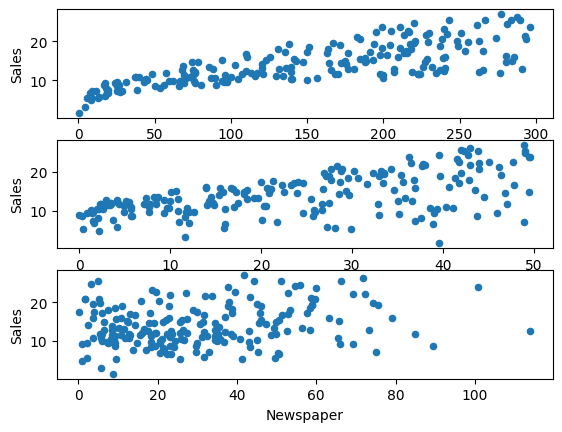

In [17]:
import matplotlib.pyplot as plt

figure, axs = plt.subplots(3, 1, sharey=True)
df_ads.plot(kind="scatter", x="TV", y="Sales", ax=axs[0])
df_ads.plot(kind="scatter", x="Radio", y="Sales", ax=axs[1])
df_ads.plot(kind="scatter", x="Newspaper", y="Sales", ax=axs[2])

In [9]:
df_ads.corr(method="pearson")

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
df_ads.plot(kind="")

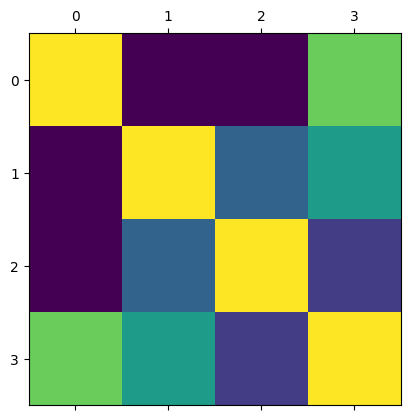

In [18]:
plt.matshow(df_ads.corr(method="pearson"))